In [1]:
import pyopenms as oms
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

In [2]:
mass_proton = 1.00727646688
bin_width = 0.5
bin_offset = 0.0

In [3]:
exp_origin = oms.MSExperiment()
oms.MzXMLFile().load("c:\\Users\poder\lab\Slider_DIA\data\e01306.mzXML", exp_origin)

In [4]:
normalizer = oms.Normalizer()
param = normalizer.getParameters()
param.setValue("method", "to_one")
normalizer.setParameters(param)

normalizer.filterPeakMap(exp_origin)

In [5]:
spectrum_collection = []
for spectrum in exp_origin:
    if spectrum.getMSLevel() > 1 and spectrum.getPrecursors()[0].getMZ() == 410.4365:
        bins = utils.discretize_spectrum(spectrum, mass_proton, bin_width, bin_offset)
        spectrum_collection.append(bins)

In [6]:
max_len = 0
for spectrum in spectrum_collection:
    if len(spectrum) > max_len:
        max_len = len(spectrum)

In [7]:
for i in range(len(spectrum_collection)):
    result = np.zeros(max_len)
    for j in range(len(spectrum_collection[i])):
        result[j] = spectrum_collection[i][j]
    spectrum_collection[i] = result

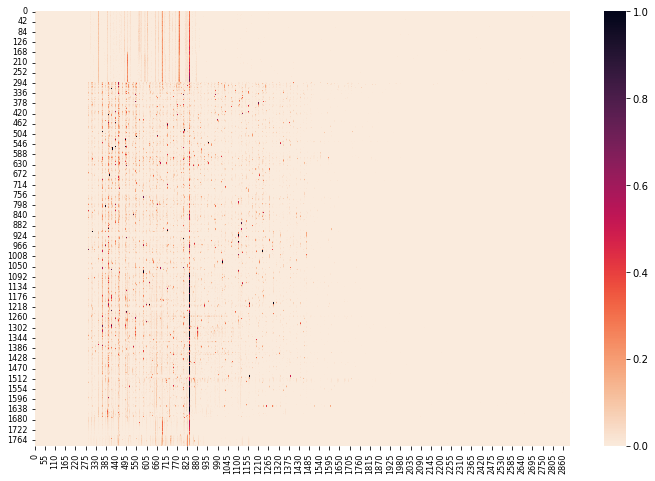

In [19]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(spectrum_collection, cmap="rocket_r")
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [11]:
exp_slider = oms.MSExperiment()
oms.MzXMLFile().load("c:\\Users\poder\mzxml_slider\output.mzXML", exp_slider)

In [12]:
spectrum_collection_slider = []
for spectrum in exp_slider:
    if spectrum.getMSLevel() > 1 and spectrum.getPrecursors()[0].getMZ() == 410.4365:
        bins = utils.discretize_spectrum(spectrum, mass_proton, bin_width, bin_offset)
        spectrum_collection_slider.append(bins)

In [13]:
max_len = 0
for spectrum in spectrum_collection_slider:
    if len(spectrum) > max_len:
        max_len = len(spectrum)

In [14]:
for i in range(len(spectrum_collection_slider)):
    result = np.zeros(max_len)
    for j in range(len(spectrum_collection_slider[i])):
        result[j] = spectrum_collection_slider[i][j]
    spectrum_collection_slider[i] = result

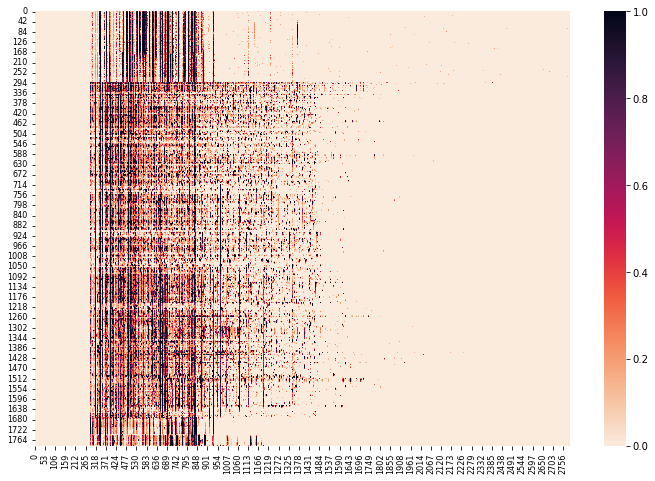

In [15]:
plt.figure(figsize = (12,8))
ax1 = sns.heatmap(spectrum_collection_slider, cmap="rocket_r", vmin=0, vmax=1)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()